# 🎲 Markov Decision Process (MDP)
## เข้าใจโครงสร้างพื้นฐานของ Reinforcement Learning แบบทีละก้าว

---

## 🚶 เริ่มต้นง่ายๆ: เรื่องราวการเดินทางไปทำงาน

ลองนึกภาพว่าคุณตื่นนอนตอนเช้าและต้อง**เดินทางไปออฟฟิศ** 🏢

### 🗺️ เส้นทางของคุณ:

```
🏠 บ้าน → 🚶 เดิน → 🚇 รถไฟ → 🚶 เดิน → 🏢 ออฟฟิศ
```

**คำถาม:** คุณต้องการข้อมูลอะไรบ้างในการตัดสินใจว่าจะเดินทางอย่างไร?

### 🤔 สองแบบคิด:

#### แบบที่ 1: จดจำทุกอย่าง (Non-Markov)
```
"เมื่อวานฝนตก → วันก่อนรถติด → สัปดาห์ที่แล้วล่าช้า..."
❌ ต้องจำทุกวันในอดีต → ข้อมูลมากเกินไป!
```

#### แบบที่ 2: ดูแค่ปัจจุบัน (Markov)
```
"ตอนนี้อยู่ที่ไหน + เวลาเท่าไร + สภาพอากาศตอนนี้"
✅ มีข้อมูลพอตัดสินใจได้!
```

### 🎯 ข้อสังเกต:
- คุณ**ไม่จำเป็นต้องรู้** ว่าเมื่อวาน/เมื่อสัปดาห์ที่แล้วเกิดอะไร
- แค่รู้ว่า **"ตอนนี้"** อยู่ที่ไหน ก็ตัดสินใจได้แล้ว
- นี่คือ **Markov Property!** 🎉

---

## 🧠 Markov Property คืออะไร? (ง่ายๆ)

### 📌 นิยาม:
**"สิ่งที่จะเกิดขึ้นต่อไปขึ้นอยู่กับสถานะปัจจุบันเท่านั้น ไม่เกี่ยวกับว่าเราเดินทางมาอย่างไร"**

### 🎮 ตัวอย่างง่ายๆ:

#### ✅ มี Markov Property:

1. **หมากรุก ♟️**
   - มองกระดานตอนนี้ → รู้ว่าเดินต่อไปได้ยังไง
   - ไม่ต้องรู้ว่า 10 ท่าที่แล้วเดินอะไร

2. **ตำแหน่ง GPS 📍**
   - รู้ว่าอยู่ที่ไหนตอนนี้ → ไปต่อได้
   - ไม่ต้องรู้ว่ามาจากไหน

3. **ยอดเงินในบัญชี 💰**
   - รู้ว่ามีเงินเท่าไร → รู้ว่าซื้ออะไรได้บ้าง
   - ไม่สนว่าเงินมาจากไหน

#### ❌ ไม่มี Markov Property:

1. **โรคประจำตัว 🏥**
   - ต้องรู้ประวัติการรักษาย้อนหลัง
   - อาการตอนนี้อย่างเดียวไม่พอ

2. **การทำนายแผ่นดินไหว 🌍**
   - ต้องดูข้อมูลย้อนหลังหลายปี
   - แค่ข้อมูลปัจจุบันไม่เพียงพอ

---

## 📈 Markov Property ในการเทรด

### 💹 ตัวอย่าง: ราคาหุ้น

สมมติคุณเป็นเทรดเดอร์:

```
📊 กราฟราคาหุ้น:
100 → 105 → 110 → 108 → ??? (ตอนนี้)
```

**คำถาม:** ราคาต่อไปจะขึ้น/ลง คุณต้องดูอะไร?

#### 🔵 Efficient Market Hypothesis (EMH) - แบบ Markov:
```
"ราคาตอนนี้ = 108 บาท"
→ สะท้อนข้อมูลทุกอย่างแล้ว
→ ราคาต่อไปขึ้นอยู่กับข่าวใหม่เท่านั้น
```

#### 🔴 Technical Analysis - ไม่ใช่ Markov:
```
"ราคาเคยขึ้นจาก 100→110 แล้วลงมา 108"
→ อาจมี pattern (Head & Shoulders, etc.)
→ ต้องดูประวัติย้อนหลัง
```

### 💡 สำหรับ RL:
เราจะ**สมมติ** ว่า environment มี Markov Property
→ ทำให้ model ง่ายขึ้น แต่ยังใช้ได้ผลในหลายกรณี

---

## 🎯 สรุป Markov Property ง่ายๆ:

| แนวคิด | คำอธิบาย | ตัวอย่าง |
|--------|----------|----------|
| **Markov** | อนาคตขึ้นอยู่กับปัจจุบัน | หมากรุก, GPS, เกม |
| **Non-Markov** | ต้องดูประวัติย้อนหลัง | โรค, แผ่นดินไหว, ภาษา |

### 📐 สูตรทางคณิตศาสตร์:
```
P(S_{t+1} | S_t, S_{t-1}, ..., S_0) = P(S_{t+1} | S_t)
        └── อนาคต ──┘  └── อดีตทั้งหมด ──┘   └── แค่ปัจจุบัน ──┘
```

**แปลเป็นภาษาคน:**
"โอกาสที่จะไปสถานะต่อไป = มองแค่สถานะปัจจุบันก็พอ"

---

## 🔜 ต่อไป: MDP คืออะไร?

เมื่อเข้าใจ Markov Property แล้ว เราจะเพิ่ม:
- **A** = Actions (การกระทำ)
- **R** = Rewards (รางวัล)
- **P** = Probabilities (ความน่าจะเป็น)

→ ได้ **Markov Decision Process (MDP)** ⬇️

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch, Circle
from matplotlib.patches import Rectangle, FancyArrow
from IPython.display import display, HTML

plt.rcParams['font.family'] = 'DejaVu Sans'
sns.set_style('whitegrid')

print("📦 Libraries loaded successfully!")
print("✅ Ready to visualize MDP concepts!")

📦 Libraries loaded successfully!
✅ Ready to visualize MDP concepts!


---

## 💰 ทำความเข้าใจ Discount Factor (γ) แบบลึก

### 🤔 ทำไมต้องมี Discount Factor?

**คำถาม:** รางวัล 100 บาทวันนี้ vs 100 บาท 1 ปีข้างหน้า อันไหนดีกว่า?

**คำตอบ:** วันนี้ดีกว่าแน่นอน! เพราะ:
1. 💵 **Time Value of Money** - เอาไปลงทุนได้ดอกเบี้ย
2. 🎲 **Uncertainty** - อนาคตไม่แน่นอน อาจไม่ได้เลย
3. 🏃 **Opportunity Cost** - สูญเสียโอกาสอื่นๆ

### 📊 Discount Factor ใน 3 โลก:

#### 1️⃣ **การเงิน (Finance)**
```
Present Value = Future Value / (1 + r)^t

ตัวอย่าง:
100 บาท 1 ปีข้างหน้า (ดอกเบี้ย 10%)
→ มูลค่าปัจจุบัน = 100 / (1.1) = 90.91 บาท
```

#### 2️⃣ **Reinforcement Learning**
```
Discounted Reward = γ^t × Reward

ตัวอย่าง (γ = 0.9):
100 บาท 1 ก้าวข้างหน้า
→ มูลค่าปัจจุบัน = 0.9 × 100 = 90 บาท
```

#### 3️⃣ **Trading**
```
กำไร 1,000 บาทวันนี้ vs 1,000 บาท 1 เดือนข้างหน้า

Day Trader (γ = 0.5):
→ กำไรวันนี้ = 1,000 บาท
→ กำไร 30 วันข้างหน้า = 0.5^30 × 1,000 ≈ 0 บาท (มองสั้น!)

Long-term Investor (γ = 0.99):
→ กำไรวันนี้ = 1,000 บาท
→ กำไร 30 วันข้างหน้า = 0.99^30 × 1,000 ≈ 740 บาท (มองยาว!)
```

---

## 🎯 Return (G) คืออะไร?

**Return = ผลตอบแทนรวมทั้งหมดที่คาดว่าจะได้**

### 📐 สูตร:

```
G_t = R_{t+1} + γ*R_{t+2} + γ²*R_{t+3} + γ³*R_{t+4} + ...
    = Σ (k=0 to ∞) γ^k × R_{t+k+1}
```

**แปลเป็นภาษาคน:**
- R_{t+1} = รางวัลในก้าวถัดไป (เต็มเม็ดเต็มหน่วย)
- γ*R_{t+2} = รางวัลใน 2 ก้าวข้างหน้า (ลดค่าลง)
- γ²*R_{t+3} = รางวัลใน 3 ก้าวข้างหน้า (ลดค่าลงมากขึ้น)

### 🧮 ตัวอย่างการคำนวณ:

สมมติได้ reward stream:
```
t=1: +10
t=2: +20
t=3: +30
t=4: +40
t=5: +50
```

#### กรณี γ = 1.0 (ไม่มี discount):
```
G = 10 + 20 + 30 + 40 + 50 = 150
```

#### กรณี γ = 0.9:
```
G = 10 + (0.9×20) + (0.9²×30) + (0.9³×40) + (0.9⁴×50)
  = 10 + 18 + 24.3 + 29.16 + 32.81
  = 114.27
```

#### กรณี γ = 0.5 (มองสั้น):
```
G = 10 + (0.5×20) + (0.5²×30) + (0.5³×40) + (0.5⁴×50)
  = 10 + 10 + 7.5 + 5 + 3.125
  = 35.625
```

**สังเกต:** γ ยิ่งต่ำ → Return ยิ่งต่ำ (เพราะตัดทิ้งอนาคต)

---

## 🎮 ตัวอย่าง: เกม Treasure Hunt

มี 2 เส้นทาง:

### 🛤️ เส้นทาง A: รางวัลทันที (Greedy)
```
ก้าวที่ 1: +100 บาท
ก้าวที่ 2: +0
ก้าวที่ 3: +0
Total = 100
```

### 🛤️ เส้นทาง B: รอแล้วได้มาก (Patient)
```
ก้าวที่ 1: +0
ก้าวที่ 2: +0
ก้าวที่ 3: +200 บาท
Total = 200
```

**คำถาม:** เลือกเส้นทางไหน?

#### ถ้า γ = 0.5 (มองสั้น):
```
Return_A = 100 + 0 + 0 = 100
Return_B = 0 + 0 + (0.5² × 200) = 0 + 0 + 50 = 50
→ เลือก A! ✅
```

#### ถ้า γ = 0.95 (มองยาว):
```
Return_A = 100 + 0 + 0 = 100
Return_B = 0 + 0 + (0.95² × 200) = 0 + 0 + 180.5 = 180.5
→ เลือก B! ✅
```

**บทเรียน:**
- γ ต่ำ → เลือกรางวัลทันที (impatient agent)
- γ สูง → ยอมรอเพื่อรางวัลใหญ่ (patient agent)

---

## 📈 การเลือก γ ใน Trading

| Trading Style | γ ที่เหมาะสม | เหตุผล |
|--------------|-------------|--------|
| **Scalping** (วินาที-นาที) | 0.1 - 0.5 | มองกำไรทันที, ไม่สน trend ยาว |
| **Day Trading** | 0.5 - 0.7 | มองภายในวัน, ปิดก่อนปิดตลาด |
| **Swing Trading** (วัน-สัปดาห์) | 0.8 - 0.9 | ถือข้าม overnight, มอง pattern |
| **Position Trading** (เดือน) | 0.95 - 0.99 | มอง trend ยาว, ไม่สนใจ noise |
| **Long-term Investment** | 0.99 - 0.999 | ถือหลายปี, มอง fundamental |

### 💡 ข้อควรระวัง:

**γ ต่ำเกินไป:**
- มองแค่กำไรทันที
- อาจพลาดโอกาส big move
- เหมาะกับตลาดผันผวนสูง

**γ สูงเกินไป:**
- มองไกลเกินไป
- อาจขาดทุนระหว่างทาง
- เหมาะกับตลาดขาขึ้นมั่นคง

---

## 🔬 ทดลองต่อไปในโค้ด!

ลองเปลี่ยนค่า γ และดูผลต่อ Return ⬇️

## 🧪 ทดลอง: ผลของ Discount Factor (γ)

สมมติเราได้ reward stream:
```
t=1: +1
t=2: +2
t=3: +3
t=4: +4
t=5: +5
```

Return แตกต่างกันอย่างไรเมื่อเปลี่ยน γ?

In [2]:
# Reward stream
rewards = [1, 2, 3, 4, 5]

def calculate_return(rewards, gamma):
    """คำนวณ discounted return"""
    G = 0
    for t, r in enumerate(rewards):
        G += (gamma ** t) * r
        if t == len(rewards)-1: 
          print(f"({gamma}**{t})*{r} : ({(gamma ** t) * r:.2f})")
        else:
          print(f"({gamma}**{t})*{r} : ({(gamma ** t) * r:.2f}) +")
    return G

# ทดสอบ gamma ต่างๆ
gammas = [0.0, 0.5, 0.9, 0.95, 0.99, 1.0]
returns = []

print("🎲 Discount Factor Experiment\n" + "="*50)
for gamma in gammas:
    G = calculate_return(rewards, gamma)
    returns.append(G)
    print(f"γ = {gamma:.2f} → Return = {G:.2f}")

print("\n📊 สังเกต:")
print(f"- γ=0.0: Return = {returns[0]:.2f} (มองแค่ขั้นแรก)")
print(f"- γ=1.0: Return = {returns[-1]:.2f} (รวมทุกอย่างเท่ากัน)")
print(f"- Difference: {returns[-1] - returns[0]:.2f}")

🎲 Discount Factor Experiment
(0.0**0)*1 : (1.00) +
(0.0**1)*2 : (0.00) +
(0.0**2)*3 : (0.00) +
(0.0**3)*4 : (0.00) +
(0.0**4)*5 : (0.00)
γ = 0.00 → Return = 1.00
(0.5**0)*1 : (1.00) +
(0.5**1)*2 : (1.00) +
(0.5**2)*3 : (0.75) +
(0.5**3)*4 : (0.50) +
(0.5**4)*5 : (0.31)
γ = 0.50 → Return = 3.56
(0.9**0)*1 : (1.00) +
(0.9**1)*2 : (1.80) +
(0.9**2)*3 : (2.43) +
(0.9**3)*4 : (2.92) +
(0.9**4)*5 : (3.28)
γ = 0.90 → Return = 11.43
(0.95**0)*1 : (1.00) +
(0.95**1)*2 : (1.90) +
(0.95**2)*3 : (2.71) +
(0.95**3)*4 : (3.43) +
(0.95**4)*5 : (4.07)
γ = 0.95 → Return = 13.11
(0.99**0)*1 : (1.00) +
(0.99**1)*2 : (1.98) +
(0.99**2)*3 : (2.94) +
(0.99**3)*4 : (3.88) +
(0.99**4)*5 : (4.80)
γ = 0.99 → Return = 14.60
(1.0**0)*1 : (1.00) +
(1.0**1)*2 : (2.00) +
(1.0**2)*3 : (3.00) +
(1.0**3)*4 : (4.00) +
(1.0**4)*5 : (5.00)
γ = 1.00 → Return = 15.00

📊 สังเกต:
- γ=0.0: Return = 1.00 (มองแค่ขั้นแรก)
- γ=1.0: Return = 15.00 (รวมทุกอย่างเท่ากัน)
- Difference: 14.00


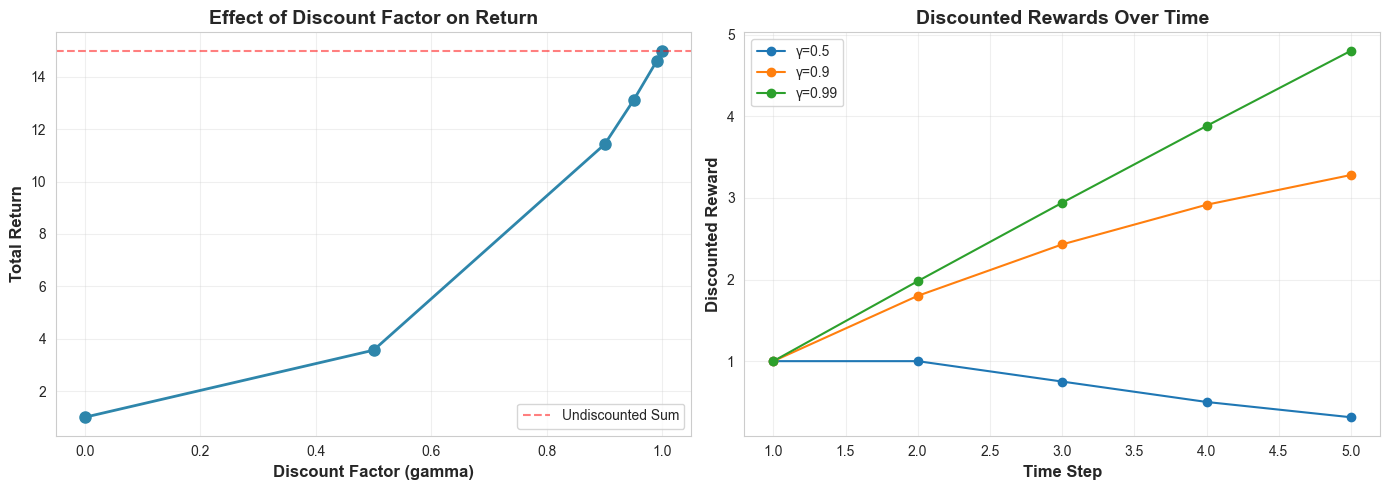


💡 Interpretation:
- γ ต่ำ: Reward ในอนาคตลดค่าลงเร็ว (agent มองสั้น)
- γ สูง: Reward ในอนาคตยังคงมีค่ามาก (agent มองยาว)


In [3]:
# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Gamma vs Return
ax1.plot(gammas, returns, marker='o', linewidth=2, markersize=8, color='#2E86AB')
ax1.set_xlabel('Discount Factor (gamma)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Total Return', fontsize=12, fontweight='bold')
ax1.set_title('Effect of Discount Factor on Return', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.axhline(y=sum(rewards), color='red', linestyle='--', alpha=0.5, label='Undiscounted Sum')
ax1.legend()

# Plot 2: Discounted Rewards over Time
time_steps = range(1, len(rewards) + 1)
for gamma in [0.5, 0.9, 0.99]:
    discounted = [(gamma ** t) * r for t, r in enumerate(rewards)]
    ax2.plot(time_steps, discounted, marker='o', label=f'γ={gamma}')

ax2.set_xlabel('Time Step', fontsize=12, fontweight='bold')
ax2.set_ylabel('Discounted Reward', fontsize=12, fontweight='bold')
ax2.set_title('Discounted Rewards Over Time', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Interpretation:")
print("- γ ต่ำ: Reward ในอนาคตลดค่าลงเร็ว (agent มองสั้น)")
print("- γ สูง: Reward ในอนาคตยังคงมีค่ามาก (agent มองยาว)")

---

## 🏆 Bellman Equation: สมการวิเศษของ RL

### 🎯 ปัญหาที่เราต้องแก้:

**คำถาม:** จะรู้ได้ยังไงว่า state นี้ "ดี" หรือ "แย่"?

**ตัวอย่าง:**
```
🤖 หุ่นยนต์อยู่ที่ช่อง A
🤔 ช่อง A ดีแค่ไหน?
→ ต้องดูว่าจาก A ไปต่อได้ reward เท่าไร
```

### 💡 แนวคิด:

**ค่าของ state = รางวัลทันที + ค่าของ state ถัดไป**

นี่คือ **Bellman Equation!**

---
## 📊 State Value Function V(s)

### 📌 นิยาม:

**V(s) = ค่าเฉลี่ยของ Return ที่คาดว่าจะได้ เมื่อเริ่มต้นที่ state s**

### 🧮 สูตรพื้นฐาน:

```
V(s) = E[G_t | S_t = s]
     = E[R_{t+1} + γ*R_{t+2} + γ²*R_{t+3} + ... | S_t = s]
```
$V^\pi(s) = \mathbb{E}_\pi \left[ \sum_{t=0}^{\infty} \gamma^t R_{t+1} \mid S_0 = s \right]$

**ทำไมต้องมี Discount Factor (γ)**

γ ทำหน้าที่ “ลดค่าความสำคัญของอนาคต”

- ทำให้ผลรวมของรางวัลอนาคต ไม่ล้นไปเรื่อย ๆ (converge ได้)
- ทำให้ Agent สนใจสมดุลระหว่าง “รางวัลเร็ว” กับ “รางวัลยาว”

> ถ้าไม่มี γ: ผลรวมอาจไม่สิ้นสุด (∞) <br>
> Agent อาจวางแผนแบบโลภหรือสั้นเกินไป

---
## 🔑 Bellman Equation สำหรับ V(s)

### 📐 สูตรสำคัญ:

```
V(s) = E[R_{t+1} + γ*G_{t+1} | S_t = s]
     = E[R_{t+1} + γ*V(S_{t+1}) | S_t = s]  ← Bellman Equation!
```
$V^\pi(s) = \sum_a \pi(a|s) \sum_{s'} P(s'|s,a) \left[ R(s,a,s') + \gamma V^\pi(s') \right]$

**แปลแบบเข้าใจง่าย:**
1. จาก state s เลือก action aตาม policy π(a∣s)
2. ย้ายไป state ถัดไป s'ด้วยความน่าจะเป็น P(s'∣s,a)
3. ได้รางวัลทันที R(s,a,s')
4. แล้วบวกค่าของอนาคต γV(s')
→ นี่แหละ “หลักการมองอนาคตแบบ discount แล้วสะสมกลับมา”

```
V(s) = รางวัลตอนนี้ + ส่วนลดของ(ค่าของอนาคต)
```
```
V[s] = expected_reward(s) + gamma * expected_value_of_next_state
```
### 💭 ทำไม recursive ได้?

```
G_t = R_{t+1} + γ*R_{t+2} + γ²*R_{t+3} + ...
    = R_{t+1} + γ*(R_{t+2} + γ*R_{t+3} + ...)
    = R_{t+1} + γ*G_{t+1}  ← แยกได้!
    
แต่ G_{t+1} = V(S_{t+1}) (by definition)

ดังนั้น:
V(s) = E[R_{t+1} + γ*V(S_{t+1})]
```

---
## 🎮 ตัวอย่างแบบง่ายมากๆ: เส้นทางตรง

มี 3 ช่อง เรียงกันตรงๆ:

```
┌─────┐   R=0    ┌─────┐   R=1    ┌──────┐
│  A  │ ────────→│  B  │ ────────→│ Goal │
│     │          │     │          │ R=10 │
└─────┘          └─────┘          └──────┘
```

**โจทย์:** หา V(A), V(B), V(Goal) โดย γ = 0.9
หา “Value” ของแต่ละ state
นั่นคือ
- V(A): ถ้าเริ่มจาก A แล้วเล่นตามนโยบายนี้ จะคาดหวังได้รางวัลรวมเท่าไหร่?
- V(B): ถ้าอยู่ที่ B แล้วเล่นต่อ จะได้รางวัลรวมเท่าไหร่?

$V(s) = R(s) + \gamma V(s')$

### 🔍 วิธีคิดแบบ step-by-step:

#### Step 1: หา V(Goal)
```
Goal เป็น terminal state → ไม่มีอนาคต
V(Goal) = 10 (รางวัลตอนจบ)
```

#### Step 2: หา V(B)
```
จาก B → Goal ได้ reward = 1
V(B) = R(B→Goal) + γ × V(Goal)
     = 1 + 0.9 × 10
     = 1 + 9
     = 10
```

**แปลความหมาย:**
- ถ้าอยู่ที่ B → เดินไป Goal ได้ reward 1
- แล้ว Goal มีค่า 10
- แต่ต้อง discount ด้วย 0.9
- รวมได้ 10 คะแนน

#### Step 3: หา V(A)
```
จาก A → B ได้ reward = 0
V(A) = R(A→B) + γ × V(B)
     = 0 + 0.9 × 10
     = 9
```

**แปลความหมาย:**
- ถ้าอยู่ที่ A → ไป B ไม่ได้ reward
- แต่ B มีค่า 10
- discount ด้วย 0.9
- ได้ 9 คะแนน

### ✅ สรุป:
```
V(A) = 9
V(B) = 10
V(Goal) = 10
```

**สังเกต:** A ได้คะแนนน้อยกว่า B เพราะไกล Goal มากกว่า!

---

## 🎲 ตัวอย่างที่ 2: Stochastic MDP

มีความน่าจะเป็น!

```
         ┌──→ Good (+5)  [60%]
         │
Start ───┤
         │
         └──→ Bad (-3)   [40%]
```

**โจทย์:** หา V(Start) โดย γ = 0.9

### 🧮 คำนวณ:

```
V(Start) = Σ P(s'|Start) × [R(Start→s') + γ × V(s')]
         = 0.6 × [5 + 1×V(Good)] + 0.4 × [-3 + 1×V(Bad)]
```

สมมติ Good และ Bad เป็น terminal:
```
(ไม่มีอนาคตแล้ว → V(Good)=V(Bad)=0)

V(Start) = 0.6 × [5 + 0] + 0.4 × [-3 + 0]
         = 0.6 × 5 + 0.4 × (-3)
         = 3 - 1.2
         = 1.8
```

**แปลความหมาย:**
- มีโอกาส 60% ได้ 3 คะแนน
- มีโอกาส 40% เสีย 1.2 คะแนน
- คาดว่าจะได้ 1.8 คะแนนโดยเฉลี่ย (positive!)

---

**γ = 0.9 หรือ γ = 1.0 V(Start) เท่ากันไหม**
- กรณี γ = 1.0
```
V(Start) = 0.6 × [5 + 1.0×0] + 0.4 × [-3 + 1.0×0]
         = 0.6 × 5 + 0.4 × (-3)
         = 1.8
```
- กรณี γ = 0.9
```
V(Start) = 0.6 × [5 + 0.9×0] + 0.4 × [-3 + 0.9×0]
         = 0.6 × 5 + 0.4 × (-3)
         = 1.8
```
เหตุผล: V(Good) = V(Bad) = 0 (terminal)

- 1.0 × 0 = 0
- 0.9 × 0 = 0
> 0 คูณอะไรก็ได้ 0 หมด!


🎯 แล้วถ้าไม่ใช่ Terminal State ล่ะ?
สมมติ Good และ Bad (ยังมีอนาคต):

V(Good) = 10
V(Bad) = 2

- กรณี γ = 1.0
```
V(Start) = 0.6×[5 + 1.0×10] + 0.4×[-3 + 1.0×2]
         = 0.6×15 + 0.4×(-1)
         = 9 - 0.4
         = 8.6
```
- กรณี γ = 0.9
```
V(Start) = 0.6×[5 + 0.9×10] + 0.4×[-3 + 0.9×2]
         = 0.6×14 + 0.4×(-1.2)
         = 8.4 - 0.48
         = 7.92
```
> ไม่เท่ากัน! γ ต่ำ → Value ต่ำ (ไม่ใส่ใจอนาคต)
---

## 🔄 Value Iteration Algorithm

### 💡 แนวคิด:

เราไม่รู้ V(s) ที่แท้จริง → ใช้วิธี **iterative update**

### 📋 ขั้นตอน:

```
1. เริ่มต้น: V(s) = 0 สำหรับทุก state
2. Repeat:
     For each state s:
         V_new(s) = E[R + γ × V_old(s')]
3. จนกว่า V จะไม่เปลี่ยนแปลง (converge)
```

### 🎯 ตัวอย่าง: เส้นทางตรง (A → B → Goal)

| Iteration | V(A) | V(B) | V(Goal) |
|-----------|------|------|---------|
| 0 | 0.00 | 0.00 | 10.00 (fixed) |
| 1 | 0.00 | 10.00 | 10.00 |
| 2 | 9.00 | 10.00 | 10.00 |
| 3 | 9.00 | 10.00 | 10.00 ✅ |

**อธิบาย:**
- World setup:
  - R(A→B)=0
  - R(B→Goal)=1
  - V(Goal)=10(fixed terminal value)
  - γ=0.9
- Iteration 0: เริ่มต้นทุกอย่าง = 0 ยกเว้น Goal
  - V(A)=0, V(B)=0, V(Goal)=10
- Iteration 1: “B รับรู้ค่าของ Goal แล้ว”
  - V(B)=R(B→Goal)+γV(Goal)=1+0.9×10=10
    - B รู้ว่า Goal ให้ 10 → update ตัวเองเป็น 10
  - V(A)=R(A→B)+γV(Bold)=0+0.9×0=0
    - A ยังไม่รู้ค่าใหม่ของ B เพราะใช้ค่าเก่าในรอบนี้
- Iteration 2: A “รับรู้ค่าของ B แล้ว”
  - V(A)=0+0.9×10=9
  - V(B)=1+0.9×10=10
- Iteration 3: ลองคำนวณอีกที...ไม่มีอะไรเปลี่ยนแล้ว ⇒ Converge! ✅
  - V(A)=0+0.9×10=9
  - V(B)=1+0.9×10=10

---

## 🎓 สรุป Bellman Equation

### 📌 Key Points:

1. **V(s) = Immediate Reward + Discounted Future Value**
   ```
   V(s) = E[R + γ × V(s')]
   ```

2. **Recursive Structure:**
   - ค่าของ state ปัจจุบันขึ้นอยู่กับค่าของ state ถัดไป
   - คล้าย Fibonacci: F(n) = F(n-1) + F(n-2)

3. **Value Iteration:**
   - Update V(s) ซ้ำๆ จนกว่าจะ converge
   - เริ่มจาก terminal states แล้วค่อยๆ propagate ย้อนกลับ

4. **Stochastic Environment:**
   - ต้องรวมความน่าจะเป็น: Σ P(s'|s,a) × [R + γ×V(s')]
   - ใช้ expected value

---

## 💪 แบบฝึกหัด

### Exercise 1:
มี 4 states: S → A → B → Goal

Rewards:
- S → A: +1
- A → B: +2
- B → Goal: +3
- Goal: +10

หา V(S), V(A), V(B) โดย γ = 0.9

### Exercise 2:
Stochastic case:
```
S → [50% → Good (+10), 50% → Bad (-5)]
```
หา V(S) โดย γ = 1

---

## 🔜 ต่อไป: โค้ดจริง!

มาดูการทำงานของ Bellman Equation ในโค้ดกัน ⬇️

In [4]:
class SimpleMDP:
    def __init__(self, gamma=0.9):
        self.gamma = gamma
        self.states = ['A', 'B', 'Goal']
        
        # Transition: {current_state: {action: (next_state, reward)}}
        self.transitions = {
            'A': {'right': ('B', 0)},
            'B': {'right': ('Goal', 1)},
            'Goal': {}  # Terminal state
        }
        
        # Terminal reward
        self.terminal_reward = 10
    
    def bellman_update(self, V):
        """Update value function ด้วย Bellman Equation"""
        new_V = V.copy()
        
        # V(Goal) = terminal reward
        new_V['Goal'] = self.terminal_reward
        
        # V(B) = R(B→Goal) + γ * V(Goal)
        next_state, reward = self.transitions['B']['right']
        new_V['B'] = reward + self.gamma * V[next_state]
        
        # V(A) = R(A→B) + γ * V(B)
        next_state, reward = self.transitions['A']['right']
        new_V['A'] = reward + self.gamma * V[next_state]
        
        return new_V
    
    def value_iteration(self, num_iterations=10):
        """Iterative ในการหา V(s)"""
        # เริ่มต้นด้วย V(s) = 0 ทุก state
        V = {s: 0 for s in self.states}
        history = [V.copy()]
        
        print("🔄 Value Iteration Process:\n" + "="*60)
        print(f"Iteration 0: V(A)={V['A']:.2f}, V(B)={V['B']:.2f}, V(Goal)={V['Goal']:.2f}")
        
        for i in range(num_iterations):
            V = self.bellman_update(V)
            history.append(V.copy())
            print(f"Iteration {i+1}: V(A)={V['A']:.2f}, V(B)={V['B']:.2f}, V(Goal)={V['Goal']:.2f}")
        
        return V, history

# Run Value Iteration
mdp = SimpleMDP(gamma=0.9)
final_V, history = mdp.value_iteration(num_iterations=10)

print("\n" + "="*60)
print("✅ Converged Values:")
print(f"V(A) = {final_V['A']:.2f}")
print(f"V(B) = {final_V['B']:.2f}")
print(f"V(Goal) = {final_V['Goal']:.2f}")

print("\n💡 ความหมาย:")
print(f"- ถ้าเริ่มที่ A → คาดว่าจะได้ return รวม {final_V['A']:.2f}")
print(f"- ถ้าเริ่มที่ B → คาดว่าจะได้ return รวม {final_V['B']:.2f}")

🔄 Value Iteration Process:
Iteration 0: V(A)=0.00, V(B)=0.00, V(Goal)=0.00
Iteration 1: V(A)=0.00, V(B)=1.00, V(Goal)=10.00
Iteration 2: V(A)=0.90, V(B)=10.00, V(Goal)=10.00
Iteration 3: V(A)=9.00, V(B)=10.00, V(Goal)=10.00
Iteration 4: V(A)=9.00, V(B)=10.00, V(Goal)=10.00
Iteration 5: V(A)=9.00, V(B)=10.00, V(Goal)=10.00
Iteration 6: V(A)=9.00, V(B)=10.00, V(Goal)=10.00
Iteration 7: V(A)=9.00, V(B)=10.00, V(Goal)=10.00
Iteration 8: V(A)=9.00, V(B)=10.00, V(Goal)=10.00
Iteration 9: V(A)=9.00, V(B)=10.00, V(Goal)=10.00
Iteration 10: V(A)=9.00, V(B)=10.00, V(Goal)=10.00

✅ Converged Values:
V(A) = 9.00
V(B) = 10.00
V(Goal) = 10.00

💡 ความหมาย:
- ถ้าเริ่มที่ A → คาดว่าจะได้ return รวม 9.00
- ถ้าเริ่มที่ B → คาดว่าจะได้ return รวม 10.00


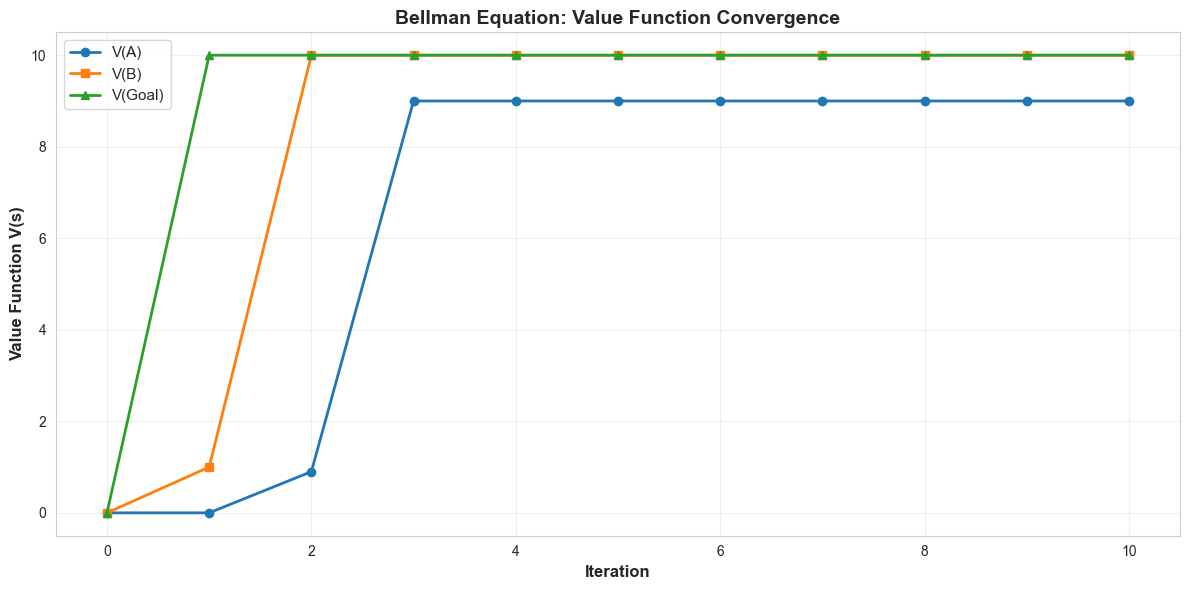


🎯 สังเกต:
- V(Goal) ไปถึง 10 ทันที (terminal reward)
- V(B) เริ่มต้นจาก 0 → เพิ่มขึ้นเพราะได้รับ reward จาก Goal
- V(A) เพิ่มขึ้นช้าที่สุด เพราะไกล Goal
- ค่า converge หลังจาก ~5-7 iterations


In [5]:
# Visualize Value Convergence
iterations = range(len(history))
V_A = [h['A'] for h in history]
V_B = [h['B'] for h in history]
V_Goal = [h['Goal'] for h in history]

plt.figure(figsize=(12, 6))
plt.plot(iterations, V_A, marker='o', label='V(A)', linewidth=2, markersize=6)
plt.plot(iterations, V_B, marker='s', label='V(B)', linewidth=2, markersize=6)
plt.plot(iterations, V_Goal, marker='^', label='V(Goal)', linewidth=2, markersize=6)

plt.xlabel('Iteration', fontsize=12, fontweight='bold')
plt.ylabel('Value Function V(s)', fontsize=12, fontweight='bold')
plt.title('Bellman Equation: Value Function Convergence', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n🎯 สังเกต:")
print("- V(Goal) ไปถึง 10 ทันที (terminal reward)")
print("- V(B) เริ่มต้นจาก 0 → เพิ่มขึ้นเพราะได้รับ reward จาก Goal")
print("- V(A) เพิ่มขึ้นช้าที่สุด เพราะไกล Goal")
print("- ค่า converge หลังจาก ~5-7 iterations")

---

## 🎲 MDP กับ Stochastic Transitions

ในโลกจริง action ไม่ได้ deterministic เสมอไป!

**ตัวอย่าง: Slippery Grid**

```
เมื่อสั่ง "ไปขวา":
- 80% โอกาส → ไปขวาจริงๆ ✅
- 10% โอกาส → ไปบน ⬆️
- 10% โอกาส → ไปล่าง ⬇️
```

Bellman Equation กลายเป็น:

```
V(s) = Σ P(s'|s,a) * [R(s,a,s') + γ * V(s')]
     = 0.8 * [R + γ*V(right)] + 0.1 * [R + γ*V(up)] + 0.1 * [R + γ*V(down)]
```

In [6]:
class StochasticMDP:
    """MDP ที่มี stochastic transitions"""
    def __init__(self, gamma=0.9):
        self.gamma = gamma
        self.states = ['Start', 'Middle', 'Good', 'Bad']
        
        # Transition probabilities: {state: {action: [(prob, next_state, reward)]}}
        self.transitions = {
            'Start': {
                'forward': [
                    (0.8, 'Middle', 0),   # 80% ไปตรง
                    (0.1, 'Good', 5),     # 10% โชคดี!
                    (0.1, 'Bad', -5)      # 10% โชคร้าย
                ]
            },
            'Middle': {
                'forward': [
                    (0.7, 'Good', 5),
                    (0.3, 'Bad', -5)
                ]
            },
            'Good': {},   # Terminal
            'Bad': {}     # Terminal
        }
        
        self.terminal_values = {'Good': 10, 'Bad': -10}
    
    def bellman_update(self, V):
        """Update with stochastic Bellman equation"""
        new_V = V.copy()
        
        # Terminal states
        new_V['Good'] = self.terminal_values['Good']
        new_V['Bad'] = self.terminal_values['Bad']
        
        # Non-terminal states
        for state in ['Start', 'Middle']:
            if state in self.transitions:
                action = 'forward'
                expected_value = 0
                
                for prob, next_state, reward in self.transitions[state][action]:
                    expected_value += prob * (reward + self.gamma * V[next_state])
                
                new_V[state] = expected_value
        
        return new_V
    
    def value_iteration(self, num_iterations=15):
        V = {s: 0 for s in self.states}
        history = [V.copy()]
        
        print("🎲 Stochastic MDP Value Iteration:\n" + "="*70)
        print(f"Iter 0: V(Start)={V['Start']:.2f}, V(Middle)={V['Middle']:.2f}, V(Good)={V['Good']:.2f}, V(Bad)={V['Bad']:.2f}")
        
        for i in range(num_iterations):
            V = self.bellman_update(V)
            history.append(V.copy())
            print(f"Iter {i+1}: V(Start)={V['Start']:.2f}, V(Middle)={V['Middle']:.2f}, V(Good)={V['Good']:.2f}, V(Bad)={V['Bad']:.2f}")
        
        return V, history

# Run Stochastic MDP
stoch_mdp = StochasticMDP(gamma=0.9)
final_V_stoch, history_stoch = stoch_mdp.value_iteration(num_iterations=15)

print("\n" + "="*70)
print("✅ Final Values:")
print(f"V(Start) = {final_V_stoch['Start']:.2f}")
print(f"V(Middle) = {final_V_stoch['Middle']:.2f}")

print("\n💡 Interpretation:")
print(f"- เริ่มที่ Start → Expected return = {final_V_stoch['Start']:.2f}")
print("- ค่าเป็นบวก แสดงว่าโดยเฉลี่ยแล้ว คาดว่าจะได้กำไร")
print("- แม้มีโอกาส 10-30% ไป Bad แต่ probability ถ่วงน้ำหนักไปทาง Good มากกว่า")

🎲 Stochastic MDP Value Iteration:
Iter 0: V(Start)=0.00, V(Middle)=0.00, V(Good)=0.00, V(Bad)=0.00
Iter 1: V(Start)=0.00, V(Middle)=2.00, V(Good)=10.00, V(Bad)=-10.00
Iter 2: V(Start)=1.44, V(Middle)=5.60, V(Good)=10.00, V(Bad)=-10.00
Iter 3: V(Start)=4.03, V(Middle)=5.60, V(Good)=10.00, V(Bad)=-10.00
Iter 4: V(Start)=4.03, V(Middle)=5.60, V(Good)=10.00, V(Bad)=-10.00
Iter 5: V(Start)=4.03, V(Middle)=5.60, V(Good)=10.00, V(Bad)=-10.00
Iter 6: V(Start)=4.03, V(Middle)=5.60, V(Good)=10.00, V(Bad)=-10.00
Iter 7: V(Start)=4.03, V(Middle)=5.60, V(Good)=10.00, V(Bad)=-10.00
Iter 8: V(Start)=4.03, V(Middle)=5.60, V(Good)=10.00, V(Bad)=-10.00
Iter 9: V(Start)=4.03, V(Middle)=5.60, V(Good)=10.00, V(Bad)=-10.00
Iter 10: V(Start)=4.03, V(Middle)=5.60, V(Good)=10.00, V(Bad)=-10.00
Iter 11: V(Start)=4.03, V(Middle)=5.60, V(Good)=10.00, V(Bad)=-10.00
Iter 12: V(Start)=4.03, V(Middle)=5.60, V(Good)=10.00, V(Bad)=-10.00
Iter 13: V(Start)=4.03, V(Middle)=5.60, V(Good)=10.00, V(Bad)=-10.00
Iter 14: V(St

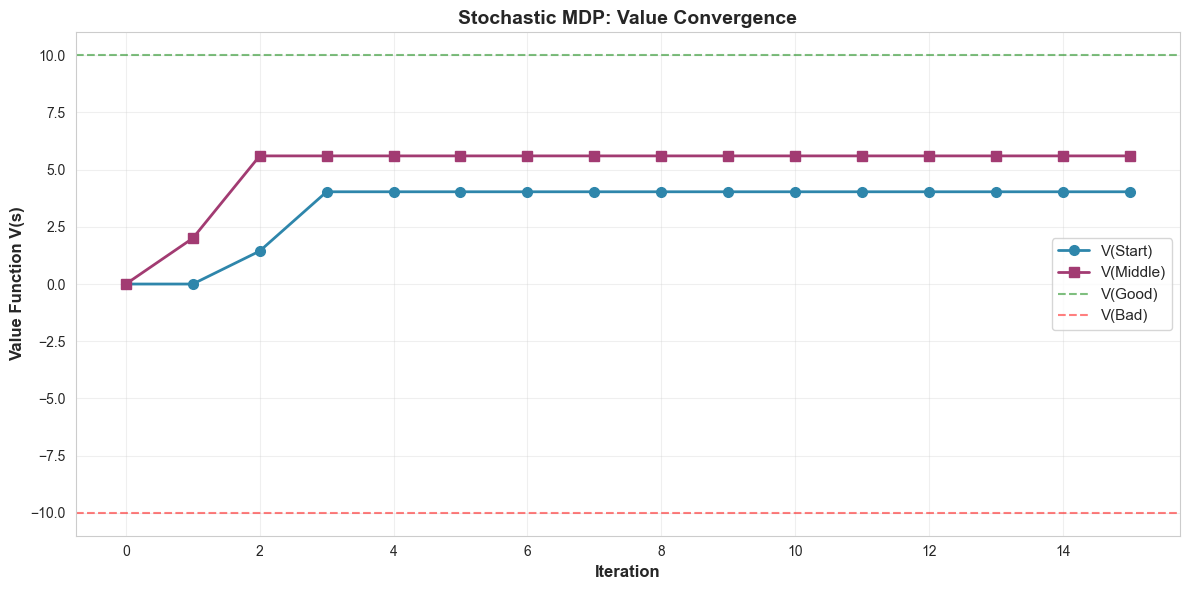


🎯 Key Insights:
- Value functions converge ด้วย expected value ของทุก possible outcomes
- Stochastic transitions ทำให้ MDP realistic มากขึ้น
- ใน Trading: ราคาหุ้นเคลื่อนไหวแบบ stochastic คล้ายกับนี้!


In [7]:
# Visualize Stochastic MDP
iterations = range(len(history_stoch))
V_Start = [h['Start'] for h in history_stoch]
V_Middle = [h['Middle'] for h in history_stoch]

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

ax.plot(iterations, V_Start, marker='o', label='V(Start)', linewidth=2, markersize=7, color='#2E86AB')
ax.plot(iterations, V_Middle, marker='s', label='V(Middle)', linewidth=2, markersize=7, color='#A23B72')
ax.axhline(y=10, color='green', linestyle='--', alpha=0.5, label='V(Good)')
ax.axhline(y=-10, color='red', linestyle='--', alpha=0.5, label='V(Bad)')

ax.set_xlabel('Iteration', fontsize=12, fontweight='bold')
ax.set_ylabel('Value Function V(s)', fontsize=12, fontweight='bold')
ax.set_title('Stochastic MDP: Value Convergence', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🎯 Key Insights:")
print("- Value functions converge ด้วย expected value ของทุก possible outcomes")
print("- Stochastic transitions ทำให้ MDP realistic มากขึ้น")
print("- ใน Trading: ราคาหุ้นเคลื่อนไหวแบบ stochastic คล้ายกับนี้!")

---

## 📊 เปรียบเทียบ: Effect of Gamma (γ)

มาดูว่า discount factor ส่งผลต่อ value function อย่างไร

In [8]:
# Compare different gamma values
gammas_to_test = [0.5, 0.9, 0.95, 0.99]
results = {}

print("🎛️ Comparing Different Gamma Values:\n" + "="*60)

for gamma in gammas_to_test:
    mdp_test = SimpleMDP(gamma=gamma)
    final_V, _ = mdp_test.value_iteration(num_iterations=10)
    results[gamma] = final_V
    print(f"\nγ = {gamma}:")
    print(f"  V(A) = {final_V['A']:.2f}")
    print(f"  V(B) = {final_V['B']:.2f}")

print("\n" + "="*60)

🎛️ Comparing Different Gamma Values:
🔄 Value Iteration Process:
Iteration 0: V(A)=0.00, V(B)=0.00, V(Goal)=0.00
Iteration 1: V(A)=0.00, V(B)=1.00, V(Goal)=10.00
Iteration 2: V(A)=0.50, V(B)=6.00, V(Goal)=10.00
Iteration 3: V(A)=3.00, V(B)=6.00, V(Goal)=10.00
Iteration 4: V(A)=3.00, V(B)=6.00, V(Goal)=10.00
Iteration 5: V(A)=3.00, V(B)=6.00, V(Goal)=10.00
Iteration 6: V(A)=3.00, V(B)=6.00, V(Goal)=10.00
Iteration 7: V(A)=3.00, V(B)=6.00, V(Goal)=10.00
Iteration 8: V(A)=3.00, V(B)=6.00, V(Goal)=10.00
Iteration 9: V(A)=3.00, V(B)=6.00, V(Goal)=10.00
Iteration 10: V(A)=3.00, V(B)=6.00, V(Goal)=10.00

γ = 0.5:
  V(A) = 3.00
  V(B) = 6.00
🔄 Value Iteration Process:
Iteration 0: V(A)=0.00, V(B)=0.00, V(Goal)=0.00
Iteration 1: V(A)=0.00, V(B)=1.00, V(Goal)=10.00
Iteration 2: V(A)=0.90, V(B)=10.00, V(Goal)=10.00
Iteration 3: V(A)=9.00, V(B)=10.00, V(Goal)=10.00
Iteration 4: V(A)=9.00, V(B)=10.00, V(Goal)=10.00
Iteration 5: V(A)=9.00, V(B)=10.00, V(Goal)=10.00
Iteration 6: V(A)=9.00, V(B)=10.00,

---

## 🎓 สรุปบทเรียน MDP

### 📚 สิ่งที่เราเรียนรู้:

#### 1️⃣ **Markov Property**
- อนาคตขึ้นอยู่กับปัจจุบันเท่านั้น
- ไม่ต้องจำประวัติทั้งหมด → ทำให้ model ง่ายขึ้น
- ตัวอย่าง: หมากรุก, GPS, ยอดเงินในบัญชี

#### 2️⃣ **MDP Components (5 ชิ้น)**
- **S** = States (สถานะทั้งหมด)
- **A** = Actions (การกระทำที่ทำได้)
- **P** = Transition Probability (โอกาสเปลี่ยน state)
- **R** = Reward Function (รางวัล/โทษ)
- **γ** = Discount Factor (ให้ความสำคัญอนาคตแค่ไหน)

#### 3️⃣ **Discount Factor (γ)**
- γ ต่ำ (0.1-0.5) → มองสั้น → Scalping, Day Trading
- γ กลาง (0.7-0.9) → ปานกลาง → Swing Trading
- γ สูง (0.95-0.999) → มองยาว → Long-term Investment
- เหตุผล: Time value of money, Uncertainty, Opportunity cost

#### 4️⃣ **Return (G)**
- G = Σ γ^k × R_{t+k+1}
- ผลรวมของ reward ทั้งหมด (ถ่วงน้ำหนักด้วย γ)
- γ สูง → Return สูง (ให้ความสำคัญอนาคต)

#### 5️⃣ **Bellman Equation**
- **V(s) = E[R + γ × V(s')]**
- ค่าของ state = รางวัลทันที + ค่าอนาคต (discounted)
- Recursive structure → ใช้ Value Iteration แก้ได้

#### 6️⃣ **Value Iteration**
- เริ่มต้น V(s) = 0
- Update ซ้ำๆ ด้วย Bellman equation
- Converge ไปสู่ค่าจริง
- จำนวน iterations ขึ้นกับ complexity ของ MDP

---

## 🎯 Key Insights สำหรับ Trading

### 💹 การประยุกต์ใช้:

1. **State Design:**
   - ราคาปัจจุบัน, Position, เงินสด
   - Technical indicators (RSI, MACD, etc.)
   - Market regime (Trending, Range-bound)

2. **Action Design:**
   - Buy, Sell, Hold
   - Position sizing
   - Stop-loss, Take-profit levels

3. **Reward Design:**
   - PnL (Profit & Loss)
   - Sharpe Ratio (risk-adjusted return)
   - Max Drawdown penalty

4. **Gamma Selection:**
   - Scalper → γ = 0.3
   - Day Trader → γ = 0.6
   - Swing Trader → γ = 0.85
   - Position Trader → γ = 0.95

---

## 🧩 เชื่อมโยงกับ Notebook ก่อนหน้า

จาก **Grid World (Notebook 01)**:
- Agent เดินในกริด → ตอนนี้เข้าใจว่าเป็น MDP
- Random vs Rule-based → ยังไม่ optimal
- ต้องหา **optimal policy** (ใน Notebook ถัดไป!)

---

## ❓ คำถามสำคัญที่ยังตอบไม่ได้:

1. **Policy คืออะไร?**
   - กฎการตัดสินใจ: π(s) → a
   - Deterministic vs Stochastic

2. **Q-Function คืออะไร?**
   - Q(s,a) = ค่าของการทำ action a ที่ state s
   - แตกต่างจาก V(s) ยังไง?

3. **จะหา Optimal Policy ได้ยังไง?**
   - Policy Iteration
   - Q-Learning
   - Deep Q-Network (DQN)

---

## 🚀 Next Steps

### 📖 Notebook ถัดไป:

👉 **[03_value_functions.ipynb](03_value_functions.ipynb)**
- เจาะลึก V(s) และ Q(s,a)
- Optimal Value Function (V*, Q*)
- Policy Evaluation

### 💪 แบบฝึกหัดเพิ่มเติม:

1. **ลอง gamma ต่างๆ:**
   - เปลี่ยน γ = 0.5, 0.95, 0.99 ใน SimpleMDP
   - สังเกตผลต่อ V(A), V(B)

2. **สร้าง MDP เอง:**
   - ออกแบบ MDP สำหรับ Trading scenario
   - กำหนด states, actions, rewards
   - คำนวณ value function

3. **Stochastic MDP:**
   - ทดลอง StochasticMDP กับ probability ต่างๆ
   - ดูว่า expected value เปลี่ยนยังไง

---

## 📚 แหล่งเรียนรู้เพิ่มเติม

### 🎥 Videos:
- [David Silver RL Course - Lecture 2: MDPs](https://www.youtube.com/watch?v=lfHX2hHRMVQ)
- [DeepMind x UCL | Intro to RL - MDP](https://www.youtube.com/watch?v=TCCjZe0y4Qc)

### 📖 Books:
- [Sutton & Barto: Reinforcement Learning (Chapter 3)](http://incompleteideas.net/book/the-book-2nd.html)
- [David Silver's Slides](https://www.davidsilver.uk/teaching/)

### 💻 Interactive:
- [OpenAI Spinning Up - MDP](https://spinningup.openai.com/en/latest/spinningup/rl_intro.html)
- [UC Berkeley CS188 - MDPs](https://inst.eecs.berkeley.edu/~cs188/)

---

## 💬 สรุปสั้นๆ (TL;DR)

**MDP = กรอบคิดสำหรับการตัดสินใจที่มีความไม่แน่นอน**

```
Agent อยู่ใน State (s)
  ↓
ทำ Action (a)
  ↓
ได้ Reward (r) และไปยัง State ใหม่ (s')
  ↓
เป้าหมาย: เก็บ Return (G) ให้ได้มากที่สุด
  ↓
ใช้ Bellman Equation หา Value Function (V)
  ↓
เลือก Action ที่ทำให้ V สูงสุด = Optimal Policy!
```

**Remember:**
- **Markov Property:** อดีตไม่สำคัญ, มองแค่ปัจจุบัน
- **Discount Factor:** balance ระหว่างมองสั้น vs มองยาว
- **Bellman Equation:** recursive magic ที่ช่วยคำนวณ value
- **Value Iteration:** update ซ้ำๆ จนกว่าจะ converge

---

## 🎉 ยินดีด้วย!

คุณเข้าใจ MDP แล้ว! 🎊

พร้อมไปต่อกับ **Value Functions และ Q-Learning** แล้ว!